In [17]:
# (D:\Prog\Anaconda) C:\Users\star>conda install -c menpo opencv
import cv2
import numpy as np
import pylab
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

#### Lilia & Gate

In [88]:
img1 = cv2.imread('Foscam\\Day_Lilia_Gate\\Snap_20190206-090254-0.jpg',cv2.IMREAD_GRAYSCALE)
img2_color = cv2.imread('Foscam\\Day_Lilia_Gate\\Snap_20190206-090254-1.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('Foscam\\Day_Lilia_Gate\\Snap_20190206-090254-1.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Foscam\\Day_Lilia_Gate\\Snap_20190206-090254-2.jpg',cv2.IMREAD_GRAYSCALE)

#### Birds

In [84]:
img1 = cv2.imread('Foscam\\Day_bird\\Snap_20190206-114342-0.jpg',cv2.IMREAD_GRAYSCALE)
img2_color = cv2.imread('Foscam\\Day_bird\\Snap_20190206-114342-1.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('Foscam\\Day_bird\\Snap_20190206-114342-1.jpg',cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('Foscam\\Day_bird\\Snap_20190206-114342-2.jpg',cv2.IMREAD_GRAYSCALE)

### Show Image

In [25]:
cv2.imshow('Source',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Show image diff

In [89]:
diff = cv2.absdiff(img2, img3)
blur = cv2.GaussianBlur(diff, (5,5), 0)

In [90]:
%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 8)

ret, th = cv2.threshold(blur, 40, 255, cv2.THRESH_BINARY)
dilated = cv2.dilate(th, np.ones((10, 10), np.uint8))
img, cnts, h = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnt: cv2.contourArea(cnt), reverse=True)  
img = img2_color.copy()
cv2.drawContours(img, cnts, -1, (0,255,255), 1)
print('Contours found : {}'.format(len(cnts)))

Contours found : 6


Contour: 4283.0
Contour: 3708.5


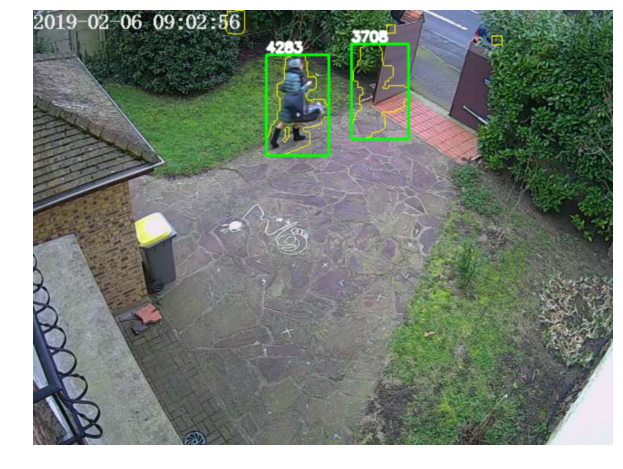

In [91]:
for c in cnts[0:2]:
    area = cv2.contourArea(c)
    #if cv2.contourArea(c) < 100:
    #    continue
    print('Contour: {}'.format(area))
        
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img,str(int(area)),(x,y-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2,cv2.LINE_AA)    

#imshow(img, cmap='rgb', aspect='equal')
plt.figure(figsize=(12, 8))
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation="bicubic")
#cv2.imshow('Diff', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### Haar Face

In [9]:
#cascadePath = "haarcascade_fullbody.xml"
cascadePath = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascadePath)
image = cv2.imread('ludi3.jpg',cv2.IMREAD_GRAYSCALE)
objects = cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=1, minSize=(30, 30))
len(objects)

13

In [10]:
for (x, y, w, h) in objects:
    crop = image[y: y + h, x: x + w]
    cv2.rectangle(image,(x,y),(x+w,y+h),(128,128,128),2)
cv2.imshow("", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Haar Body

In [5]:
cascadePath = "haarcascade_fullbody.xml"
#cascadePath = "haarcascade_upperbody.xml"
cascade = cv2.CascadeClassifier(cascadePath)
image = cv2.imread('ludi3.jpg',cv2.IMREAD_COLOR)
objects = cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=1, minSize=(60, 60))
len(objects)

3

In [6]:
for (x, y, w, h) in objects:
    crop = image[y: y + h, x: x + w]
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,256,0),4)
cv2.imshow("", image)
cv2.waitKey(0)
cv2.destroyAllWindows()